# Explore the Gensim implementation
> Mikolov, T., Grave, E., Bojanowski, P., Puhrsch, C., & Joulin, A. (2017). Advances in pre-training distributed word representations. arXiv preprint arXiv:1712.09405.

In [1]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from gensim.models import Word2Vec, KeyedVectors
from gensim.test.utils import datapath

In [4]:
wv = KeyedVectors.load_word2vec_format(datapath("/Users/flint/Data/word2vec/GoogleNews-vectors-negative300.bin"), 
                                       binary=True)

## Similarity

In [5]:
pairs = [
    ('car', 'minivan'),   # a minivan is a kind of car
    ('car', 'bicycle'),   # still a wheeled vehicle
    ('car', 'airplane'),  # ok, no wheels, but still a vehicle
    ('car', 'cereal'),    # ... and so on
    ('car', 'communism'),
]
for w1, w2 in pairs:
    print('%r\t%r\t%.2f' % (w1, w2, wv.similarity(w1, w2)))

'car'	'minivan'	0.69
'car'	'bicycle'	0.54
'car'	'airplane'	0.42
'car'	'cereal'	0.14
'car'	'communism'	0.06


In [6]:
for x, y in wv.most_similar('pizza'):
    print(x, y)

pizzas 0.7863470315933228
Domino_pizza 0.7342829704284668
Pizza 0.6988078355789185
pepperoni_pizza 0.6902607083320618
sandwich 0.6840401887893677
burger 0.6569692492485046
sandwiches 0.6495091319084167
takeout_pizza 0.6491535902023315
gourmet_pizza 0.6400628089904785
meatball_sandwich 0.6377009749412537


In [56]:
vectors = []
for word in ['car', 'minivan', 'bicycle', 'airplane']:
    vectors.append(wv.get_vector(word))
V = np.array(vectors)

In [57]:
v = V.mean(axis=0)

print(v)

#v = v - wv.get_vector('car')

[ 1.44226074e-01 -6.29272461e-02 -1.86157227e-03  3.36608887e-02
 -3.40881348e-02 -1.92108154e-01  4.43115234e-02 -2.16186523e-01
  2.69287109e-01  2.95410156e-02  2.29736328e-01 -1.63024902e-01
  1.02573395e-01 -1.12518311e-01 -1.67846680e-02  5.32836914e-02
 -6.10275269e-02  8.65478516e-02  1.27197266e-01  4.43115234e-02
  7.01293945e-02 -1.74789429e-02 -1.12884521e-01  5.61523438e-03
  6.15692139e-02  2.16674805e-03 -1.09191895e-01  1.79321289e-01
  3.07373047e-01  1.48315430e-02 -1.25259399e-01 -1.83288574e-01
 -4.57153320e-02  1.40197754e-01 -1.35589600e-01 -9.58251953e-02
  2.16690063e-01  6.10351562e-05 -1.13525391e-01  6.99386597e-02
 -7.07397461e-02  1.05438232e-01  1.56341553e-01  1.45401001e-01
 -2.04406738e-01  7.43408203e-02  2.68173218e-02  1.35681152e-01
  3.46679688e-01  2.37426758e-02 -2.63916016e-01  3.02246094e-01
  1.34643555e-01  1.26770020e-01 -2.03125000e-01 -1.32141113e-02
  5.70297241e-03  9.94873047e-02  1.25610352e-01 -3.10058594e-02
  1.82006836e-01 -1.59912

In [58]:
wv.similar_by_vector(v)

[('car', 0.852258026599884),
 ('minivan', 0.8156529664993286),
 ('vehicle', 0.7754934430122375),
 ('SUV', 0.7660486698150635),
 ('bicycle', 0.7264742255210876),
 ('pickup_truck', 0.723552942276001),
 ('scooter', 0.7198848724365234),
 ('truck', 0.7041884064674377),
 ('Jeep', 0.7000145316123962),
 ('motorcycle', 0.6802986264228821)]

## Analogy

FRANCE : PARIS = ITALY : ?

PARIS - FRANCE + ITALY

In [10]:
wv.most_similar(positive=['Paris', 'Italy'], negative=['France'])

[('Milan', 0.7222141623497009),
 ('Rome', 0.702830970287323),
 ('Palermo_Sicily', 0.5967570543289185),
 ('Italian', 0.5911272764205933),
 ('Tuscany', 0.5632812976837158),
 ('Bologna', 0.5608358383178711),
 ('Sicily', 0.5596384406089783),
 ('Bologna_Italy', 0.5470058917999268),
 ('Berna_Milan', 0.5464027523994446),
 ('Genoa', 0.5308900475502014)]

In [11]:
wv.most_similar(positive=['King', 'Woman'], negative=['Man'])

[('Queen', 0.4929387867450714),
 ('Tupou_V.', 0.45174285769462585),
 ('Oprah_BFF_Gayle', 0.4422132968902588),
 ('Jackson', 0.440250426530838),
 ('NECN_Alison', 0.4331282675266266),
 ('Whitfield', 0.42834725975990295),
 ('Ida_Vandross', 0.42084527015686035),
 ('prosecutor_Dan_Satterberg', 0.420758992433548),
 ('martin_Luther_King', 0.42059651017189026),
 ('Coretta_King', 0.4202733635902405)]

## Not matching

In [12]:
wv.doesnt_match("school professor apple student".split())

'apple'

## Mean

In [13]:
vp = wv['school']
vr = wv['professor']
vx = wv['student']
m = (vp + vr + vx) / 3

In [14]:
wv.similar_by_vector(m)

[('student', 0.8481254577636719),
 ('professor', 0.7627506852149963),
 ('teacher', 0.6942789554595947),
 ('school', 0.6849855780601501),
 ('students', 0.6768636703491211),
 ('lecturer', 0.6700003147125244),
 ('faculty', 0.645453155040741),
 ('university', 0.6376535892486572),
 ('professors', 0.6346085667610168),
 ('associate_professor', 0.6325882077217102)]

In [15]:
pairs = [
    ('lecturer', 'school'),
    ('lecturer', 'professor'),
    ('lecturer', 'student'),
    ('lecturer', 'teacher'),
]
for w1, w2 in pairs:
    print('%r\t%r\t%.2f' % (w1, w2, wv.similarity(w1, w2)))

'lecturer'	'school'	0.18
'lecturer'	'professor'	0.80
'lecturer'	'student'	0.43
'lecturer'	'teacher'	0.48


## Context

In [16]:
wv.most_similar('buy')

[('sell', 0.8308461308479309),
 ('purchase', 0.7639904618263245),
 ('buying', 0.7209187746047974),
 ('bought', 0.7087081074714661),
 ('buys', 0.6617438197135925),
 ('Buy', 0.5850198864936829),
 ('tobuy', 0.5843992829322815),
 ('purchased', 0.582695484161377),
 ('Buying', 0.578020453453064),
 ('acquire', 0.5730165839195251)]

In [17]:
wv.similarity('buy', 'money')

0.31760776

## Train a custom model

In [18]:
import gensim.models

### Generate a global model for YELP reviews

In [19]:
import json
from nltk.tokenize import word_tokenize
from string import punctuation

In [20]:
review_data_file = '/Users/flint/Data/yelp/data/yelp_sample.json'
with open(review_data_file, 'r') as infile:
    R = json.load(infile)

In [21]:
R[0]

{'content': "Red, white and bleu salad was super yum and a great addition to the menu! This location was clean with great service and food served at just the right temps! Kids pizza is always a hit too with lots of great side dish options for the kiddos! When I'm on this side of town, this will definitely be a spot I'll hit up again!",
 'date': '2014-02-17',
 'stars': 4,
 'useful': 1,
 'funny': 0,
 'cool': 0,
 'business': 'Ue6-WhXvI-_1xUIuapl0zQ',
 'id': '----X0BIDP9tA49U3RvdSQ',
 'categories': ['American (Traditional)', 'Burgers', 'Restaurants']}

In [22]:
data = [[x.lower() for x in word_tokenize(doc['content']) if x not in punctuation] for doc in R]

In [23]:
data[0][:6]

['red', 'white', 'and', 'bleu', 'salad', 'was']

In [24]:
R0 = gensim.models.Word2Vec(sentences=data, epochs=25, window=6, vector_size=100)

In [25]:
R0.wv.most_similar('car')

[('vehicle', 0.7783134579658508),
 ('battery', 0.61270672082901),
 ('dealership', 0.5907988548278809),
 ('bike', 0.5900876522064209),
 ('insurance', 0.5317571759223938),
 ('warranty', 0.5301386117935181),
 ('company', 0.524592936038971),
 ('teeth', 0.5224493145942688),
 ('backyard', 0.5171056985855103),
 ('mechanic', 0.5154500603675842)]

### Application example: use graph community detection to find aspects

In [26]:
import networkx as nx

In [27]:
min_sim = 0.7
G = nx.Graph()
for word in tqdm(R0.wv.index_to_key):
    for match, sim in R0.wv.most_similar(word):
        if sim >= min_sim:
            G.add_edge(word, match, sim=sim)

  0%|          | 0/8837 [00:00<?, ?it/s]

In [28]:
for a, b, c in G.edges(data=True):
    print(a, b, c)
    break

you u {'sim': 0.7822895646095276}


### Visualize

In [32]:
from pyvis.network import Network

In [40]:
nt = Network('1500px', '1500px')
nt.from_nx(G.subgraph(list(G.nodes)[:100]))
nt.show('./imgs/word2vec.html', notebook=False)

./imgs/word2vec.html


In [41]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme(style="whitegrid")

In [42]:
tsne = TSNE(n_components=2, perplexity=6)
m = []
for word in list(G.nodes)[:100]:
    v = R0.wv.get_vector(word)
    m.append(v)
X = tsne.fit_transform(np.array(m))

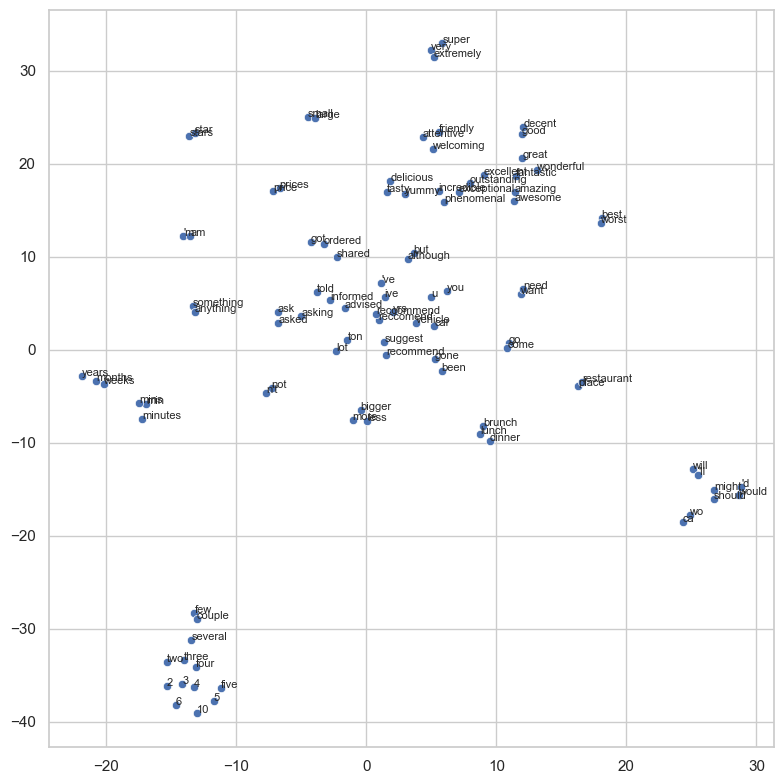

In [44]:
fig, ax = plt.subplots(figsize=(8, 8), ncols=1)
sns.scatterplot(x=X[:,0], y=X[:,1], ax=ax)
for j, w in enumerate(list(G.nodes)[:100]):
    ax.text(X[j][0], X[j][1], w, fontsize=8)
plt.tight_layout()
plt.show()

### Community detection

In [45]:
from networkx.algorithms.community import greedy_modularity_communities

In [46]:
communities = greedy_modularity_communities(G)
for community in communities:
    print(list(community)[:10])

['onion', 'pistachio', 'icing', 'bisque', 'fig', 'balls', 'almond', 'acidic', 'bean', 'poppers']
["d'autres", 'grande', 'pris', 'bien', 'montréal', 'ce', 'aux', 'fixe', 'goût', 'sur']
['muss', 'der', 'er', 'wurde', 'einem', 'zur', 'immer', 'auf', 'darauf', 'alles']
['quesadilla', 'skirt', 'kalbi', 'brisket', 'enchiladas', 'parm', 'scrambled', 'pork', 'roast', 'chop']
['tender', 'bun', 'ripe', 'flakey', 'thin', 'moist', 'tasteless', 'dry', 'thick', 'fluffy']
['five', '35', '30-45', '8', '15', '20', 'forty', '2.5', '20-30', 'three']
['picked', 'hung', 'elvis', 'pick', 'summed', 'wake', 'signing', 'screwed', 'wound', 'screw']
['friendly', 'polite', 'helpful', 'courteous', 'enthusiastic', 'considerate', 'talented', 'responsive', 'knowledgable', 'competent']
['mom', 'son', 'co-worker', 'mother', 'bff', 'fiancé', 'dad', 'coworker', 'father', 'boyfriend']
['decorated', 'appointed', 'ambiance', 'classy', 'quiet', 'decor', 'neat', 'modern', 'inviting', 'relaxing']
['8pm', '7pm', '11pm', '9pm', 

## Update an existing model
Let's create a collection for each category

In [47]:
from collections import defaultdict

In [48]:
corpora = defaultdict(list)
for review in R:
    content, categories = review['content'], review['categories']
    tokens = [x.lower() for x in word_tokenize(content) if x not in punctuation]
    for category in categories:
        corpora[category].append(tokens)

In [49]:
corpora['RV Rental'][0][:10]

['unbelievable',
 'how',
 'the',
 'employees',
 'that',
 'work',
 'in',
 'the',
 'front',
 'part']

### Update the global model with the local information (i.e., create a model for each category)

In [50]:
import copy

In [51]:
selected_categories = ['Burgers', 'Indian', 'Italian', 'Seafood']
models = {}
runs = [(c, d) for c, d in corpora.items() if c in selected_categories]
for category, data in tqdm(runs):
    models[category] = copy.deepcopy(R0)
    models[category].train(data, total_examples=R0.corpus_count, epochs=R0.epochs)

  0%|          | 0/4 [00:00<?, ?it/s]

In [52]:
print(list(models.keys()))

['Burgers', 'Indian', 'Italian', 'Seafood']


In [53]:
word = 'food'
for cat, m in models.items():
    print(cat, [x for x, y in m.wv.most_similar(word, topn=20)][:5])

Burgers ['sushi', 'fare', 'ambiance', 'meal', 'presentation']
Indian ['meal', 'sushi', 'pizza', 'fare', 'it']
Italian ['consistently', 'sushi', 'meal', 'ambiance', 'atmosphere']
Seafood ['foods', 'sushi', 'presentation', 'ambiance', 'fare']


#### Filter common words

In [54]:
counter = defaultdict(lambda: 0)
for cat, m in models.items():
    for x, y in m.wv.most_similar(word, topn=20):
        counter[x] += 1
for cat, m in models.items():
    print(cat, [x for x, y in m.wv.most_similar(word, topn=20) if counter[x] < 3])

Burgers ['shockingly', 'service', 'pricing', 'margaritas', 'it', 'ambience', 'insanely']
Indian ['it', 'service', 'restaurant', 'restaurants', 'drinks', 'beer']
Italian ['ambience', 'margaritas', 'waitstaff', 'pricing', 'milkshakes', 'product', 'attentive']
Seafood ['waitstaff', 'overall', 'pizzas', 'attentive', 'dishes', 'value', 'meals']


## Exercise: train a model from wordnet

How `word2vec` may be used to disambiguate words and lookup for synsets

In [55]:
from nltk.corpus import wordnet as wn
import nltk

words = ['cat', 'dog', 'bird', 'fish']

h = lambda s: s.hypernyms()
p = lambda s: s.hyponyms()

def get_pseudo_sentences(word, context=3):
    sentences = []
    for s in wn.synsets(word):
        for lemma in s.lemmas():
            sentences.append([lemma.name(), s.name()])
        for i, j in enumerate(s.closure(h)):
            sentences.append([s.name(), j.name()])
            for lemma in j.lemmas():
                sentences.append([lemma.name(), j.name()])
            if i == context:
                break
        for i, j in enumerate(s.closure(p)):
            sentences.append([j.name(), s.name()])
            for lemma in j.lemmas():
                sentences.append([lemma.name(), j.name()])
            if i == context:
                break
    return sentences

sentences = []
for w in words:
    sentences += get_pseudo_sentences(w)
    
print(sentences[0])

model = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=1, workers=4)

model.wv.most_similar('fish')

['cat', 'cat.n.01']


[('fish.v.01', 0.33891671895980835),
 ('shuttle', 0.3145788609981537),
 ('run_down', 0.29708608984947205),
 ('solid_food', 0.28112900257110596),
 ('brail', 0.27431318163871765),
 ('grownup', 0.27283111214637756),
 ('pictorial_representation', 0.209917813539505),
 ('eel.n.01', 0.20881067216396332),
 ('weenie', 0.2070414274930954),
 ('hot_dog', 0.19912771880626678)]